### Importing and Understanding Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing necessary libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 20)

In [3]:
# Importing Day.csv (Bike Sharing Dataset) and the data dictionary
bike = pd.read_csv('day.csv')
metadata = pd.read_excel('Data_Dictionary.xlsx')


In [4]:
# Looking at the first five rows and getting the shape
bike.head()
bike.shape

(730, 16)

In [5]:
# Looking at the unique values in each column.
bike.nunique()


instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [6]:
# Looking at the Null values in each column.
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#No NULL values so nothing to drop right away

### Data Preparation and Dummy Variables

Considering the information given in the data dictionary and a premilinary analysis, the following variables can be removed. The justification is also given.

1) instant : It is a unique row identifier (an index value)

2) dteday : This is a redundant column since the year and month columns (yr and mnth) are already available in the dataset

3) casual & registered : A customer is either casual or registered. We don't need to categorize the customers into casual or registered for our analysis. The total count is what we need so we will retain 'cnt', which is the target variable


In [8]:
# Saving the modified dataframe with specific columns as bike_mod 
bike_mod = bike [['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]
bike_mod

,season,yr,mnth,holiday,weekday,...,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,...,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,...,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,...,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,...,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,...,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,...,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,...,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,...,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,...,10.489153,11.58500,48.3333,23.500518,1796


In [9]:
#The columns with categorical variables (season, weathersit, month, weekday) are integers so we need to convert them to 'category' datatype
bike_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [10]:
#Converting the categorical variable datatype
bike_mod['weekday']=bike_mod['weekday'].astype('category')
bike_mod['weathersit']=bike_mod['weathersit'].astype('category')
bike_mod['mnth']=bike_mod['mnth'].astype('category')
bike_mod['season']=bike_mod['season'].astype('category')
bike_mod.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [11]:
#Creating dummies and dropping the first feature for the categorical variables
bike_mod = pd.get_dummies(bike_mod, drop_first=True)
bike_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [12]:
# Check the bike_mod dataframe now
bike_mod.head()

,yr,holiday,workingday,temp,atemp,...,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,...,0,0,1,1,0
1,0,0,0,14.902598,17.68695,...,0,0,0,1,0
2,0,0,1,8.050924,9.47025,...,0,0,0,0,0
3,0,0,1,8.200000,10.60610,...,0,0,0,0,0
4,0,0,1,9.305237,11.46350,...,0,0,0,0,0


## Splitting the Data into Training and Testing Sets

In [13]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(bike_mod, train_size = 0.7, test_size = 0.3, random_state = 100)

In [14]:
#Checking the number of rows in train and test datasets 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null   

In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    int64  
 8   season_2      219 non-null    uint8  
 9   season_3      219 non-null    uint8  
 10  season_4      219 non-null    uint8  
 11  mnth_2        219 non-null    uint8  
 12  mnth_3        219 non-null    uint8  
 13  mnth_4        219 non-null    uint8  
 14  mnth_5        219 non-null    uint8  
 15  mnth_6        219 non-null    uint8  
 16  mnth_7        219 non-null    uint8  
 17  mnth_8        219 non-null    uint8  
 18  mnth_9        219 non-null   

### Rescaling the Features 

We will use MinMax scaling.

In [16]:
#Making a list of all the numeric variables 
num_vars = df_train [['cnt','temp', 'hum','windspeed','atemp']]


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [18]:
# Apply scaler() to all the numeric columns
num_vars = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train[num_vars].head()

,cnt,temp,atemp,hum,windspeed
653,0.864243,0.509887,0.501133,0.575354,0.300794
576,0.827658,0.815169,0.766351,0.725633,0.264686
426,0.465255,0.442393,0.438975,0.640189,0.255342
728,0.204096,0.245101,0.200348,0.498067,0.663106
482,0.482973,0.395666,0.391735,0.504508,0.188475


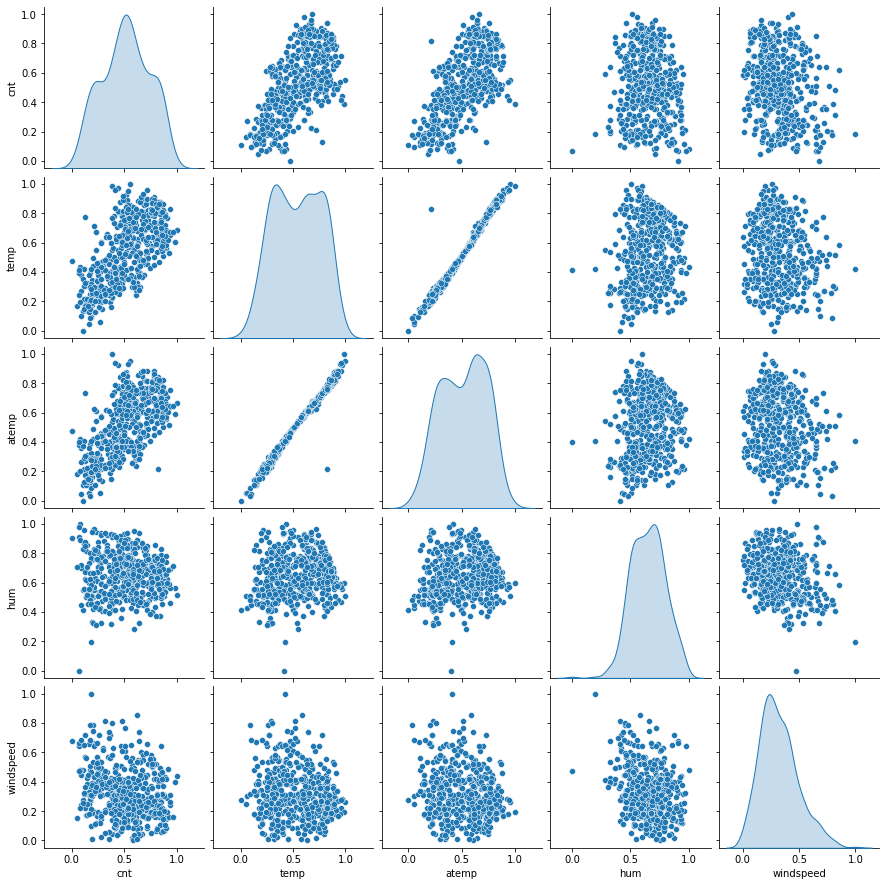

In [19]:
#Visualizing the relationship between numeric variables

sns.pairplot(df_train[num_vars], diag_kind='kde')
plt.show()

We can see that temp and atemp are highly dependent. Also there seems to be a linear relationship between our target variable 'cnt' and 'temp', 'atemp'.  

### Dividing into X and Y sets for the model building

In [20]:
y_train = df_train.pop('cnt')
X_train = df_train


In [21]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 510 entries, 653 to 79
Series name: cnt
Non-Null Count  Dtype  
--------------  -----  
510 non-null    float64
dtypes: float64(1)
memory usage: 8.0 KB


## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)


### RFE
Recursive feature elimination

In [22]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [23]:
# Running RFE with the output number of the variable equal to 15 since we have 28 features
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [24]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', False, 2),
 ('mnth_4', False, 4),
 ('mnth_5', False, 3),
 ('mnth_6', False, 5),
 ('mnth_7', False, 8),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 9),
 ('mnth_12', False, 10),
 ('weekday_1', False, 11),
 ('weekday_2', False, 12),
 ('weekday_3', False, 14),
 ('weekday_4', False, 15),
 ('weekday_5', False, 13),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [25]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [26]:
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [27]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [28]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [29]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [30]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.7
Date:                Sun, 19 Nov 2023   Prob (F-statistic):          1.89e-191
Time:                        23:50:10   Log-Likelihood:                 520.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1950      0.029      6.791   

In [31]:
#Since the p value of season_3 is too high, it will be dropped
X_train_new = X_train_rfe.drop(["season_3"], axis = 1)

Rebuilding the model without `season_3`

In [32]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [33]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [34]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Sun, 19 Nov 2023   Prob (F-statistic):          3.24e-192
Time:                        23:50:10   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1945      0.029      6.770   

In [35]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_2', 'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [36]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [37]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.59
3,temp,10.01
2,workingday,5.05
5,windspeed,3.82
7,season_4,2.27
12,weathersit_2,2.14
0,yr,2.03
11,weekday_6,1.90
6,season_2,1.83
10,mnth_10,1.62


In [38]:
#Removing features one by one with a VIF of >5 (starting with hum)
X_train_new = X_train_new.drop(['hum'], axis=1)


In [39]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.38
2,workingday,4.39
4,windspeed,3.60
0,yr,2.02
6,season_4,2.02
5,season_2,1.82
10,weekday_6,1.77
9,mnth_10,1.62
7,mnth_8,1.59
11,weathersit_2,1.54


Even though the VIF for temp is > 5, removing it reduced the R-squared to 69%, so retaining it

In [40]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [41]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Rerunning the linear model

In [42]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.9
Date:                Sun, 19 Nov 2023   Prob (F-statistic):          6.16e-189
Time:                        23:50:10   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -989.1
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0945      0.019      4.961   

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [43]:
y_train_price = lm.predict(X_train_lm)

In [44]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

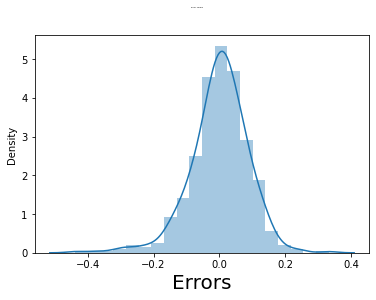

In [45]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 2)                  # Plot heading 
plt.xlabel('Errors', fontsize = 20)                         # X-label

In [46]:
Since the residuals in the above histogram are normally distributed we can say that the error terms are valid

SyntaxError: invalid syntax (103669085.py, line 1)

## Making Predictions

#### Applying the scaling on the test sets

In [47]:
num_vars = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [48]:
y_test = df_test.pop('cnt')
X_test = df_test

In [49]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [50]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

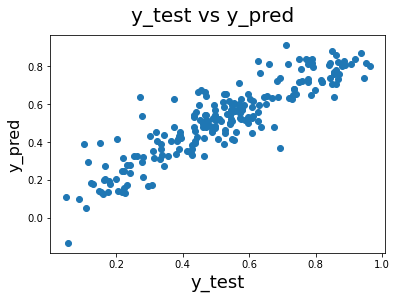

In [51]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

We can see that y_test and y_pred values are more or less close

### Checking the R-squared and Adjusted R-squared on the test data


In [52]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8026410728126752

In [53]:
#r2 is the r2 score we obtained from the above code
r2=0.8203092200749708

# n is number of rows in X
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7927376189224531

The adjusted R2 value is 0.79

### Final Metrics

Train Data
1) R2 = 0.842 <br>
2) Adjusted R2 = 0.838 <br>

Test Data
1) R2 = 0.80 <br>
2) Adjusted R2 = 0.79